**© 2022 Scott A. Bruce. Do not distribute.**

# Basic data visualization in Python

This notebook follows Chapter 4 in the Python Workshop textbook starting from the section on Plotting Techniques.  Herein, we will use the `matplotlib` and `seaborn` packages to create basic visualizations in Python.  Each visualization comes with strengths and weaknesses and choosing an appropriate visualization for the task at hand is often a source of frustration for content creators and readers alike.  Choose wisely!  Some general guidance is provided in what follows.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Exercise 62 (scatter plot)

Scatter plots are a great choice when visualizing a collection of independent data points.

In [2]:
temperature = [14.2, 16.4, 11.9, 12.5, 18.9, 22.1, 19.4, 23.1, 25.4, 18.1, 22.6, 17.2]
sales = [215.20, 325.00, 185.20, 330.20, 418.60, 520.25, 412.20, 614.60, 544.80, 421.40, 445.50, 408.10]

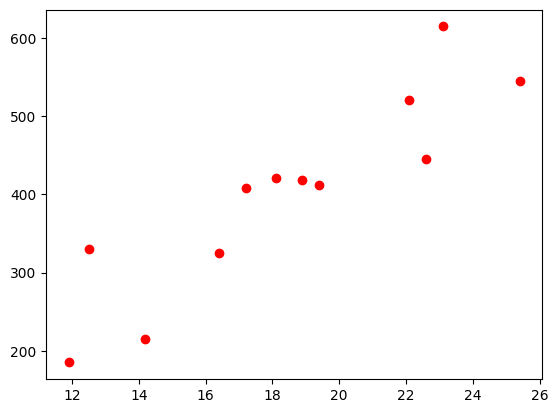

<function matplotlib.pyplot.show(close=None, block=None)>

In [3]:
plt.scatter(temperature, sales, color='red')
plt.show()
plt.show


Text(0.5, 1.0, 'Ice-cream sales versus Temperature')

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Sales')

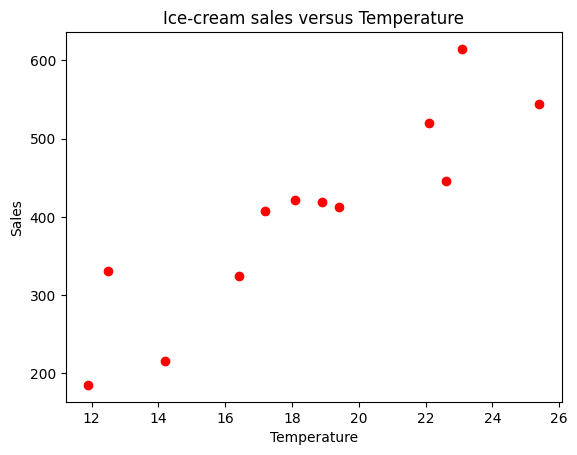

In [4]:
plt.title('Ice-cream sales versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.scatter(temperature, sales, color='red')
plt.show()

## 2. Exercise 63 (line plot)

Line plots are useful when visualizing data points that are connected in some meaningful way over the x-axis (e.g. repeated measurements over time).

In [5]:
stock_price = [190.64, 190.09, 192.25, 191.79, 194.45, 196.45, 196.45, 196.42, 200.32, 200.32, 
               200.85, 199.2, 199.2, 199.2, 199.46, 201.46, 197.54, 201.12, 203.12, 203.12, 203.12, 202.83, 202.83, 203.36, 206.83, 204.9, 204.9, 204.9, 204.4, 204.06]

Text(0.5, 1.0, 'Opening Stock Prices')

Text(0.5, 0, 'Days')

Text(0, 0.5, '$ USD')

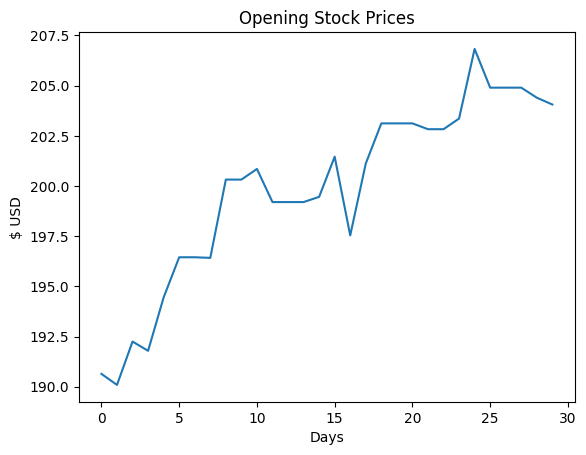

In [6]:
plt.plot(stock_price)
plt.title('Opening Stock Prices')
plt.xlabel('Days')
plt.ylabel('$ USD')
plt.show()

In [7]:
t = list(range(1, 31))

([<matplotlib.axis.XTick at 0x7f3e49716f28>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

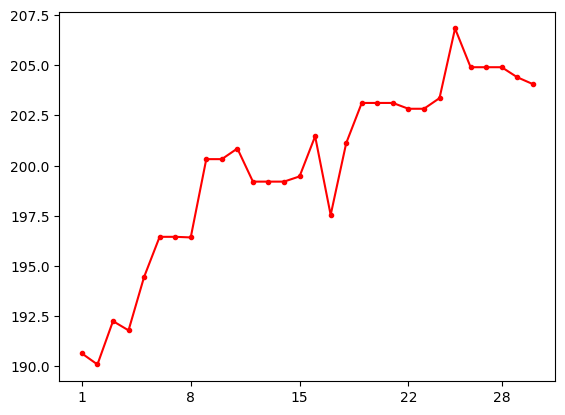

In [8]:
plt.plot(t, stock_price, marker='.', color='red')
plt.xticks([1, 8, 15, 22, 28])
plt.show()

## 3. Exercise 64 (bar plot)

Bar plots are generally useful in portraying counts of items across categories (each with its own bar).

In [9]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']
students_count = [20, 30, 10, 5, 8, 2]

<BarContainer object of 6 artists>

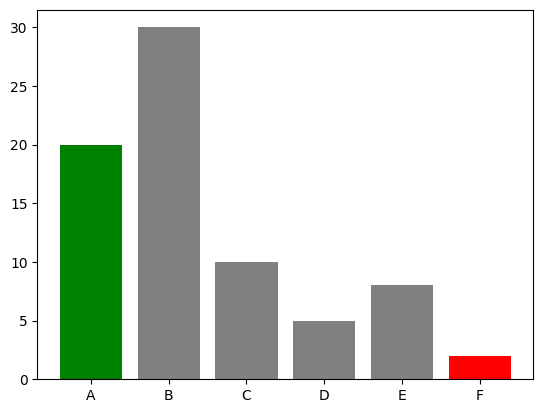

In [10]:
plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red'])

Text(0.5, 1.0, 'Grades Bar Plot for Biology Class')

Text(0.5, 0, 'Grade')

Text(0, 0.5, 'Num Students')

<BarContainer object of 6 artists>

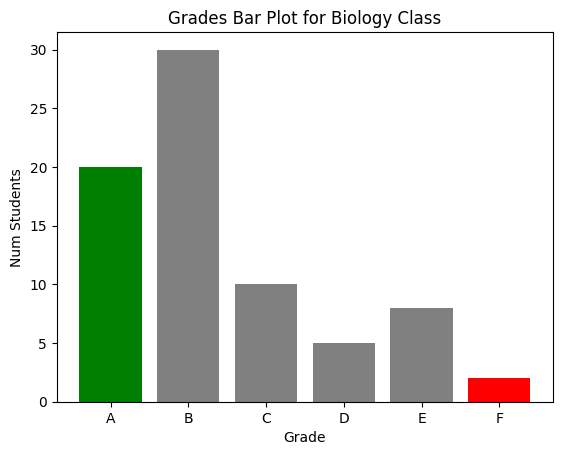

In [11]:
plt.title('Grades Bar Plot for Biology Class')
plt.xlabel('Grade')
plt.ylabel('Num Students')
plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red'])
plt.show()

<BarContainer object of 6 artists>

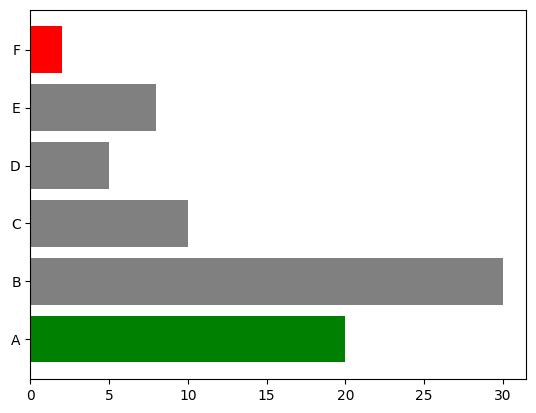

In [12]:
plt.barh(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red']) # maybe used in long category names

## 4. Exercise 65 (pie chart)

Use sparingly.  Pie charts are useful for conveying fractional data and percentages.  However, pie charts make it difficult to compare the relative proportions across many categories.  Often times a bar chart or a table can be used in place of a pie chart, which can enable more accurate comparisons across categories.

In [13]:
labels = ['Monica', 'Adrian', 'Jared']
num = [230, 100, 98] # Note that this does not need to be percentages

([<matplotlib.patches.Wedge at 0x7f3e49530320>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Monica'),
  Text(-0.6228249215772513, -0.906691301966822, 'Adrian'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

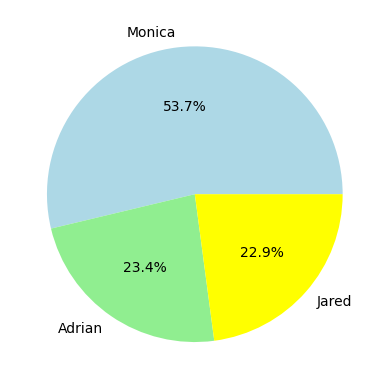

In [14]:
plt.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'yellow'])

Text(0.5, 1.0, 'Voting Results: Club President')

([<matplotlib.patches.Wedge at 0x7f3e49493080>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Monica'),
  Text(-0.6228249215772513, -0.906691301966822, 'Adrian'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

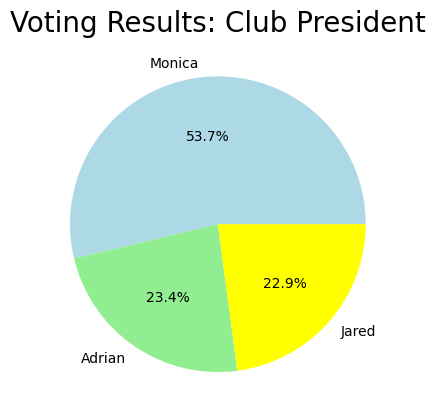

In [15]:
plt.title('Voting Results: Club President', fontdict={'fontsize': 20})
plt.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'yellow'])
plt.show()

## 5. Exercise 66 (heat map)

Heat maps are an excellent visualization for illustrating the relationship between two categorical variables.  First, we will define a heatmap function.

In [16]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

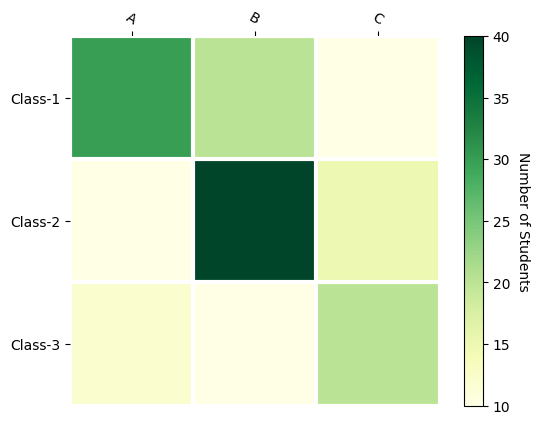

In [17]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [30, 20, 10,],
    [10, 40, 15],
    [12, 10, 20]
])

im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')


Notice that we used a `numpy` array to store the data for the heatmap?  More on this later...

It would be helpful to be able to provide more information about the particular values corresponding to each color.  To accomplish this, we can define another function (below) that does this. 

In [18]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    import matplotlib
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


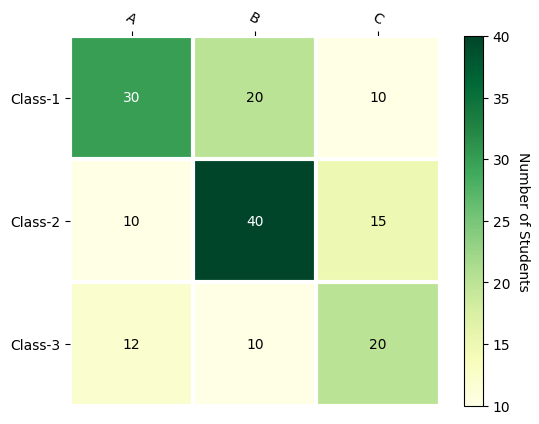

In [19]:
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')
texts = annotate_heatmap(im, valfmt="{x}")

## 6. Exercise 67 (histogram + density plot)

When visualizing the distribution of a continuous variable, histograms and density plots are a great option.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

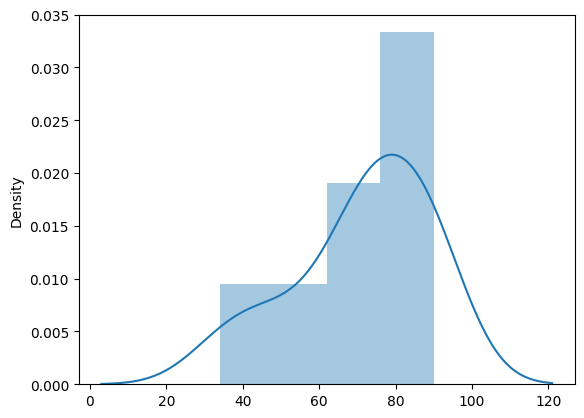

In [20]:
data = [90, 80, 50, 42, 89, 78, 34, 70, 67, 73, 74, 80, 60, 90, 90]
sns.distplot(data)

Text(0.5, 1.0, 'Density Plot')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Density')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Density Plot'}, xlabel='Score', ylabel='Density'>

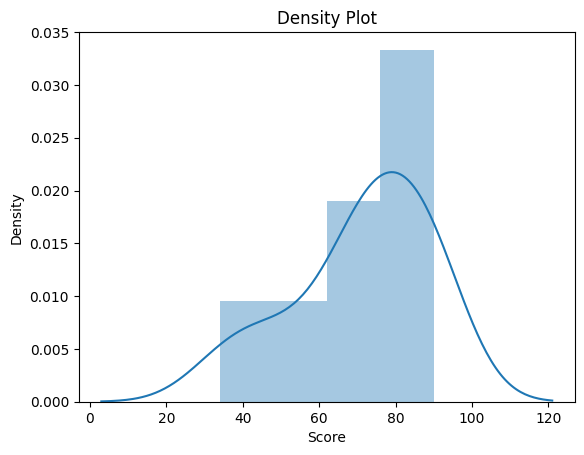

In [21]:
plt.title('Density Plot')
plt.xlabel('Score')
plt.ylabel('Density')
sns.distplot(data)
plt.show()

easily to identify clusters in the dataset that may not be visible in histogram or one-dimensional graph

Text(0.5, 1.0, 'Weight Dataset - Contour Plot')

Text(0, 0.5, 'height (cm)')

Text(0.5, 0, 'weight (kg)')

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Weight Dataset - Contour Plot'}, xlabel='weight (kg)', ylabel='height (cm)'>

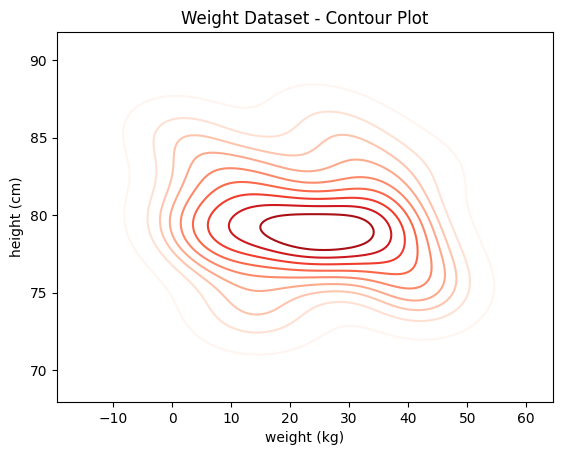

In [22]:
height=[85.08,79.25,85.38,82.64,80.51,77.48,79.25,78.75,77.21,73.11,82.03,82.54,
        74.62,79.82,79.78,77.94,83.43,73.71,80.23,78.27,78.25,80.00,76.21,86.65,
        78.22,78.51,79.60,83.88,77.68,78.92,79.06,85.30,82.41,79.70,80.16,81.11,
        79.58,77.42,75.82,74.09,78.31,83.17,75.20,76.14]
weight = list(range(1,45))
plt.title('Weight Dataset - Contour Plot')
plt.ylabel('height (cm)')
plt.xlabel('weight (kg)')
sns.kdeplot(weight, height, cmap="Reds", ) # cmap = color map 

## 7. More on visualizing univariate and bivariate distributions from the seaborn package documentation

For more details visit https://seaborn.pydata.org/tutorial/distributions.html

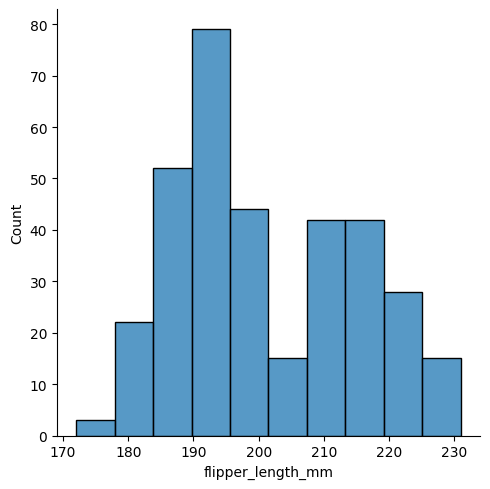

In [26]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

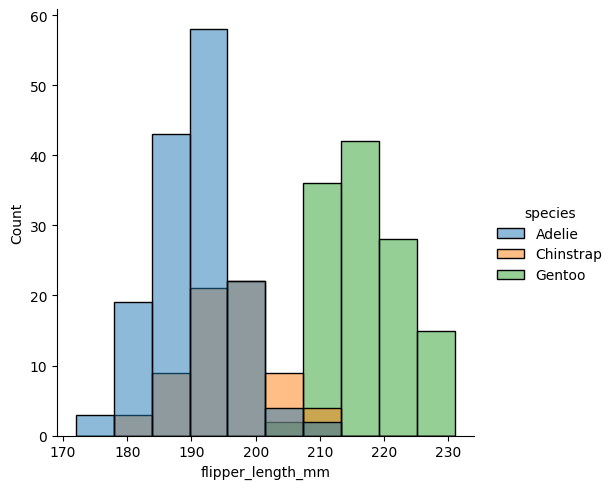

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

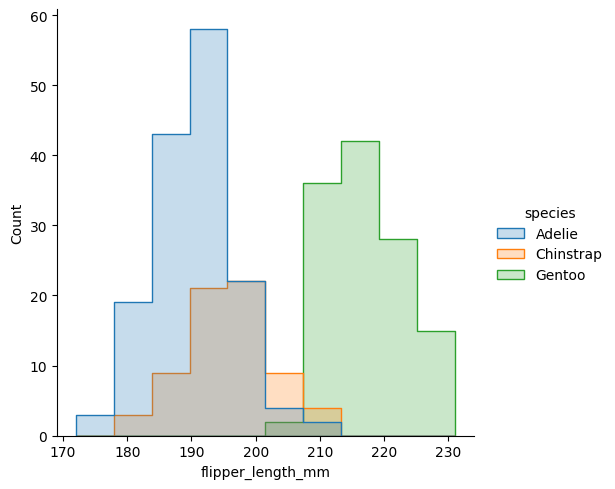

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

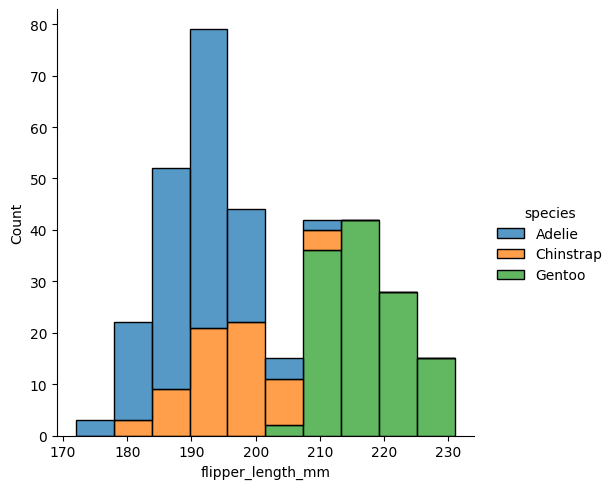

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

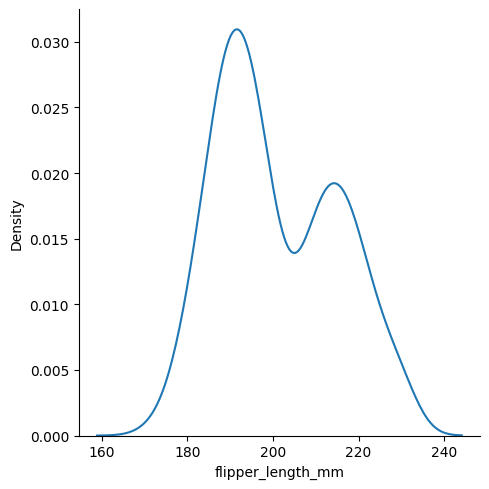

In [30]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

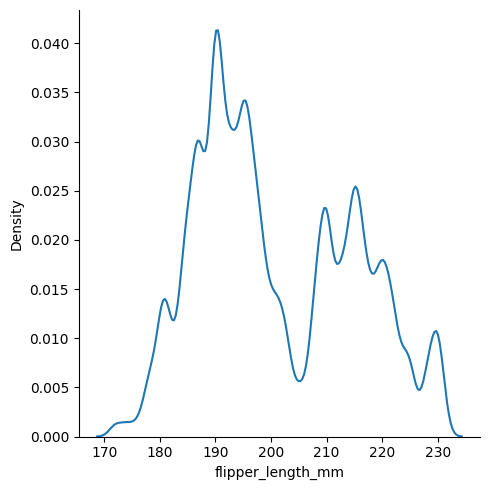

In [31]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25) # kde: kernel density estimate # bw: bandwidth 

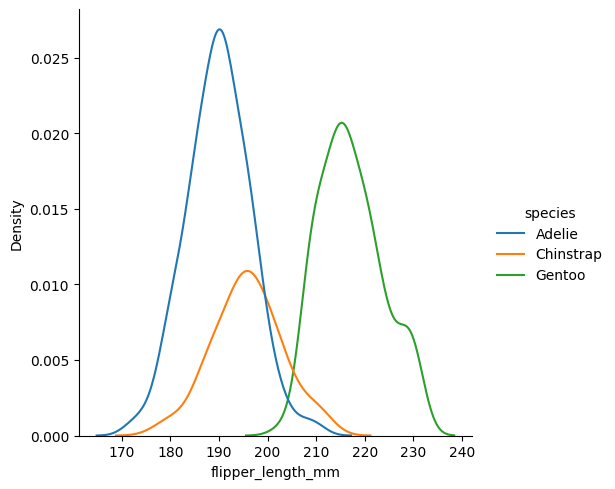

In [32]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

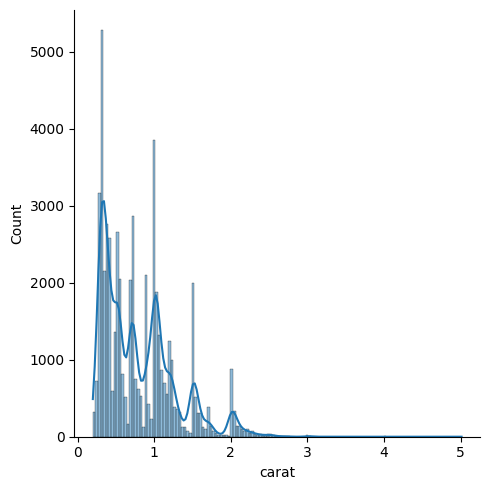

In [33]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kde=True)

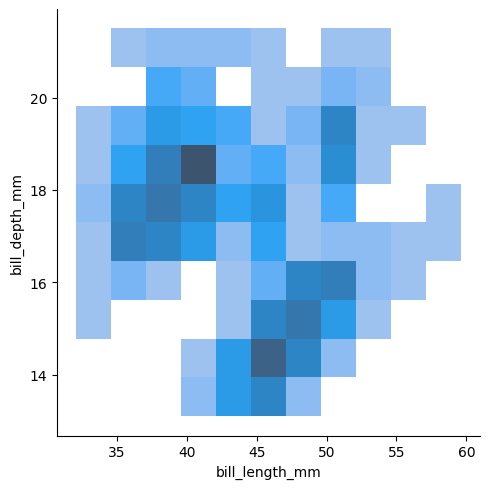

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm") 
# dark blue corresponds to some numbers and want to compare to the numbers of lighter blue
# bc not able to perceive differences in colors and translate back to numerical differences easily, 
# this plot is not the best for making accurate comparisons about distribution 
# color is really helpful for identifying clusters. 
# so if your purpose is these three species are quite different and cluster together, this plot is fine. 

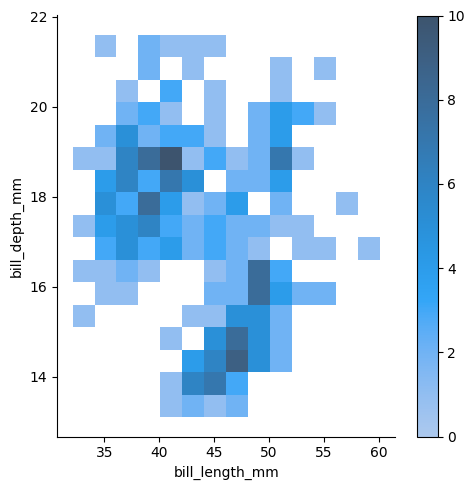

In [35]:
# but if you want to make more accurate comparisons of distribution, you can add color bar helping a little but not tremendously. 
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

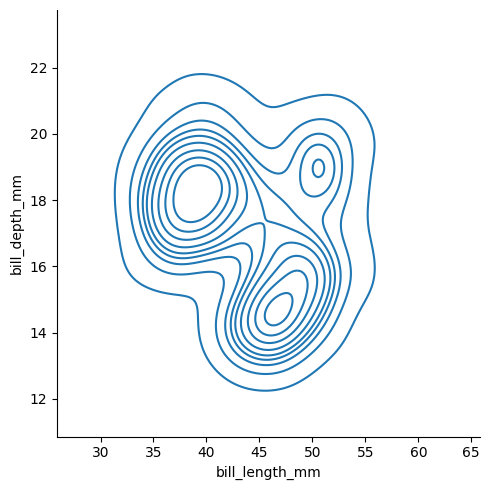

In [36]:
# or you can do a contour plot 
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

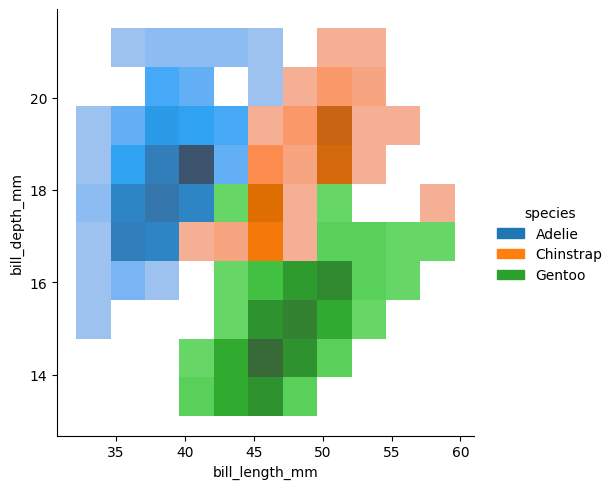

In [37]:
# same code, use different colors 
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

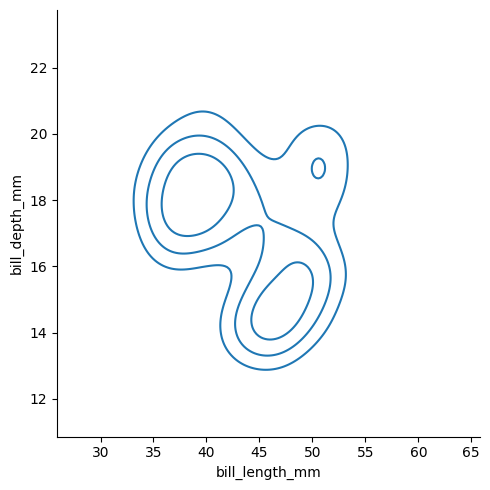

In [38]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

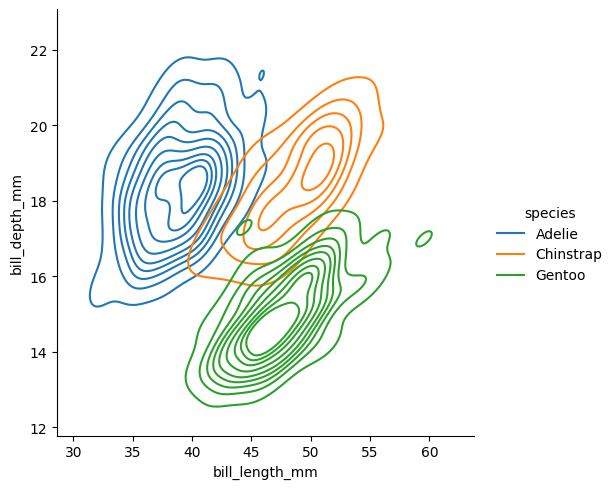

In [39]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

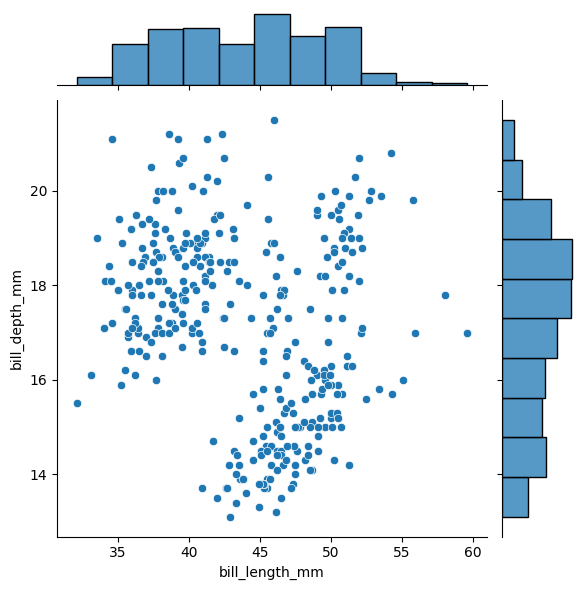

In [40]:
# jointplot let us get scatter plot and univariate distributions around axises 
# if you want all information in one plot, this will do the trick. 
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

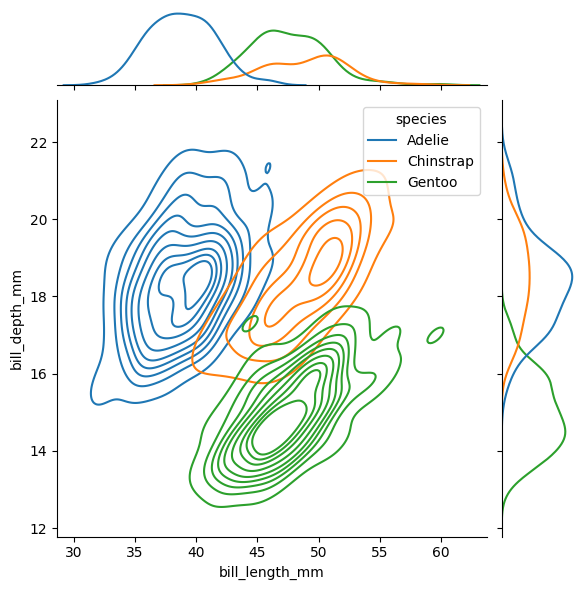

In [41]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

AttributeError: module 'seaborn' has no attribute 'hisplot'

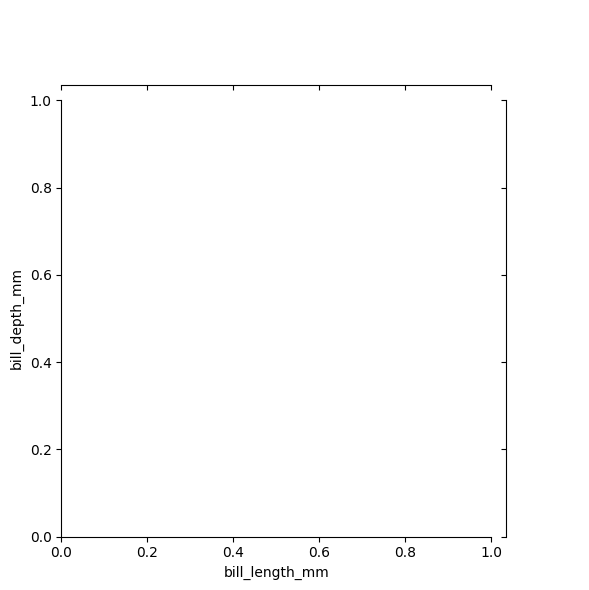

In [42]:
# boxplot with kde
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [ ]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

TypeError: rugplot() missing 1 required positional argument: 'a'

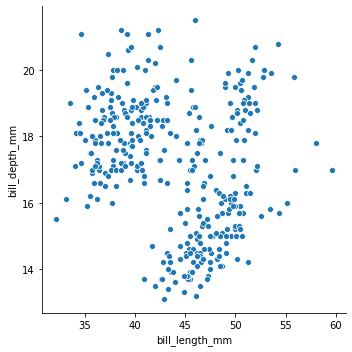

In [35]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

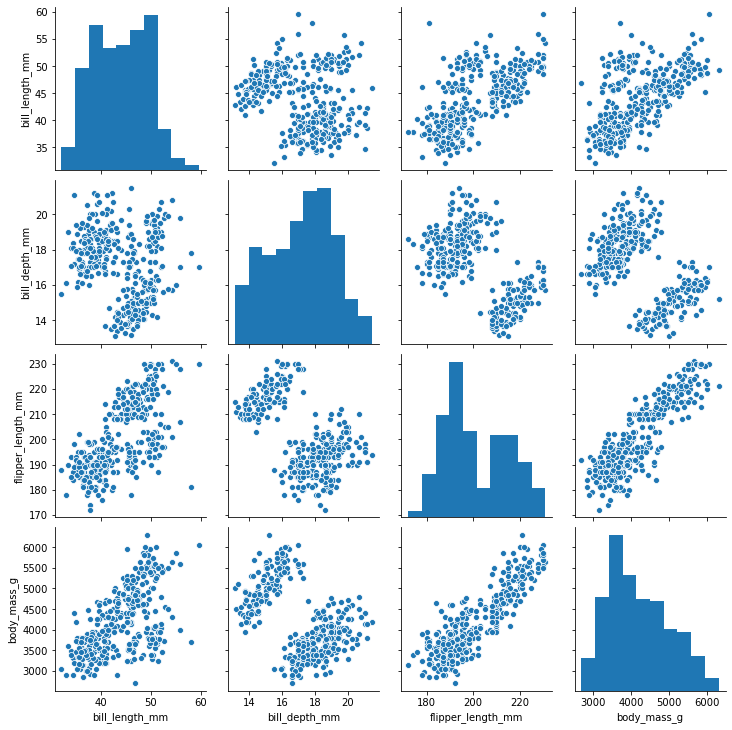

In [33]:
# pairplot: scatter plot metrics that you can build in R. 
# Univariate distributions along the diagonal and scatter plot of bivariate variable distributions for all variables. 
sns.pairplot(penguins)

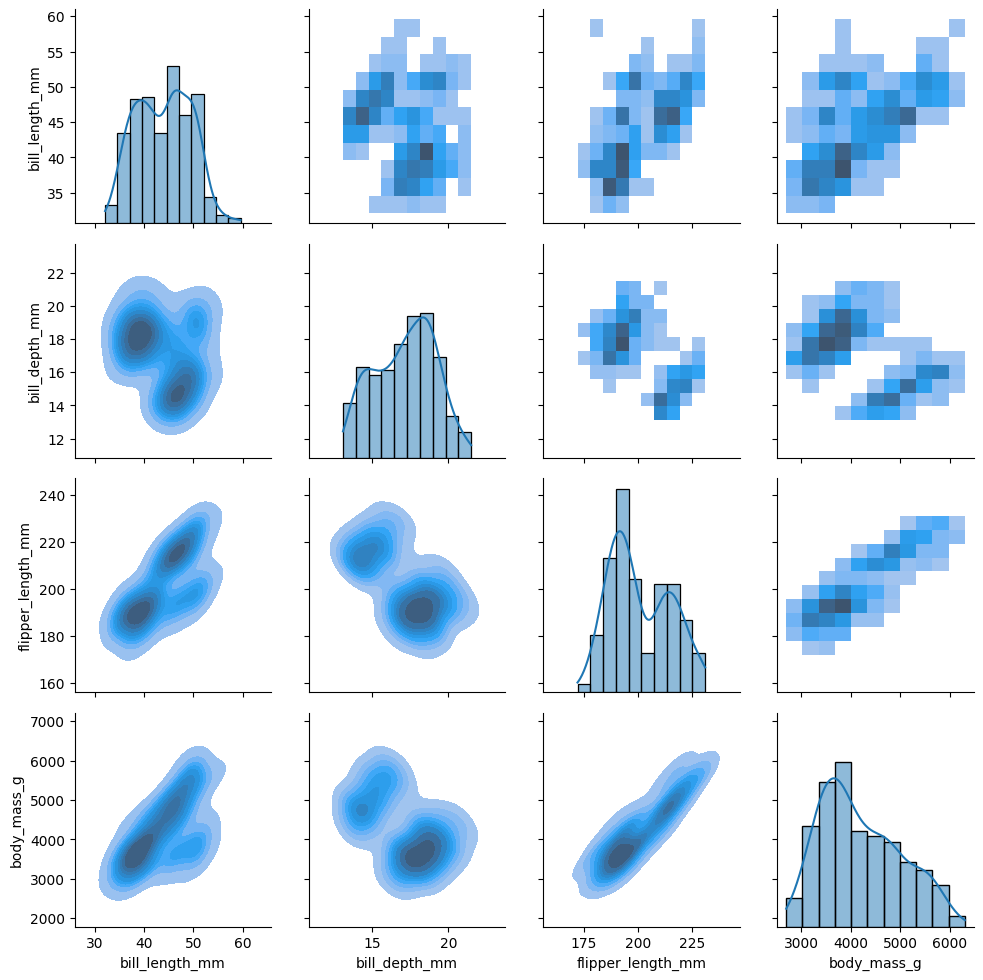

In [43]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## 8. Multiple charts in the same figure

([<matplotlib.patches.Wedge at 0x7f3e4413b320>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Adrian'),
  Text(-0.6228249215772513, -0.906691301966822, 'Monica'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

Text(0.5, 1.0, 'Pie Chart (Subplot 1)')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Bar Chart (Subplot 2)')

Text(0.5, 0, 'Candidate')

Text(0, 0.5, 'Votes')

Text(0.5, 0.98, 'Voting Results')

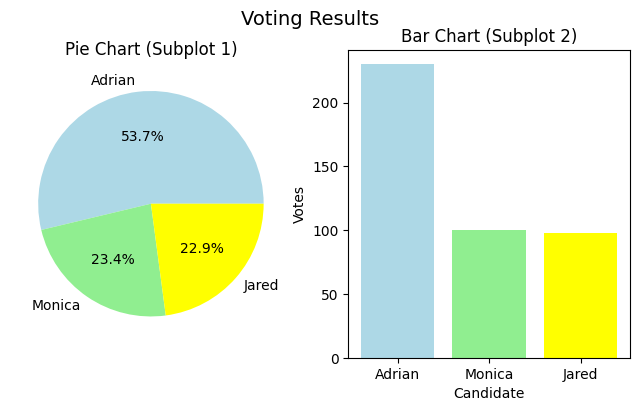

In [44]:
# Split the figure into 2 subplots
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121) # 121 means split into 1 row, 2 cols, and put in the 1st part
ax2 = fig.add_subplot(122) # 121 means split into 1 row, 2 cols, and put in the 2nd part

#first subplot
labels = ['Adrian','Monica','Jared']
num = [230, 100, 98]
ax1.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue','lightgreen','yellow'])
ax1.set_title('Pie Chart (Subplot 1)')

#second subplot
plt.bar(labels, num, color=['lightblue','lightgreen','yellow'])
ax2.set_title('Bar Chart (Subplot 2)')
ax2.set_xlabel('Candidate')
ax2.set_ylabel('Votes')
fig.suptitle('Voting Results', size=14)

## 9. Exercise 69 (3-D plots)

Text(0.5, 0.92, 'Demo of 3D Plot')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

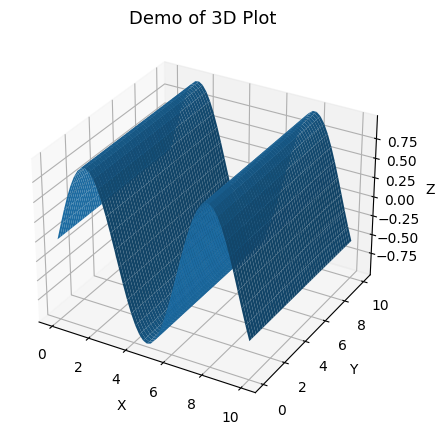

In [45]:
from mpl_toolkits.mplot3d import Axes3D
X = np.linspace(0, 10, 50)
Y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(X, Y)
Z = (np.sin(X))

# Setup axis
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

# Add title and axes labels
ax.set_title("Demo of 3D Plot", size=13)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

For other fascinating 3-D plots available in matplotlib, visit https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html.

## 10. Dos and don'ts of data visualization

### 10.1 Design principles

**Design for the audience**

General audience considerations:
 - Language, knowledge, skills, expectation
 - Broad cultural representations and conventions
 - Discipline based conventions and preferences
 
Individual specific limitations and abilities
 - Visual acuity
 - Color blindness
 - Document accessibility regulations (https://www.epa.gov/accessibility/what-section-508)
 

**Design for the task**

Discovery and hypothesis generation
 - Comparative views: let the data speak, avoid confirmation bias
 - Alternative views: Change context, scale and visual perspective
 - Interactive views: sliders, dropdowns, filters
 
Analysis
 - Inferential graphics: hypothesis tests, error rate control confidence levels, ROC curves
 - Model graphics: structure, comparisons, residuals, criticism
 
Decision Making
 - Actionable graphics
 
Communication, teaching, learning
 - Summaries
 - Visual stories and explanations
 - Establish the problem, elaborate, and resolve
 - Verbal presentations with a single picture
 

 
 

### 10.2 Human perception and cognition

**Structuring input**
 - We continuously structure our sensory input on different scales.  
 - Many times we are unaware of this structuring.  For example, the blood supply of the retina is located in front of the retina, which means that light passes through the blood supply on its way to the photodetectors on the retina. We don't see the retinal blood supply because it doesn't change, and our eyes ignore unchanging images.
 - The mind is not a camera that stores everything we see exactly (remember - things get structured).
 
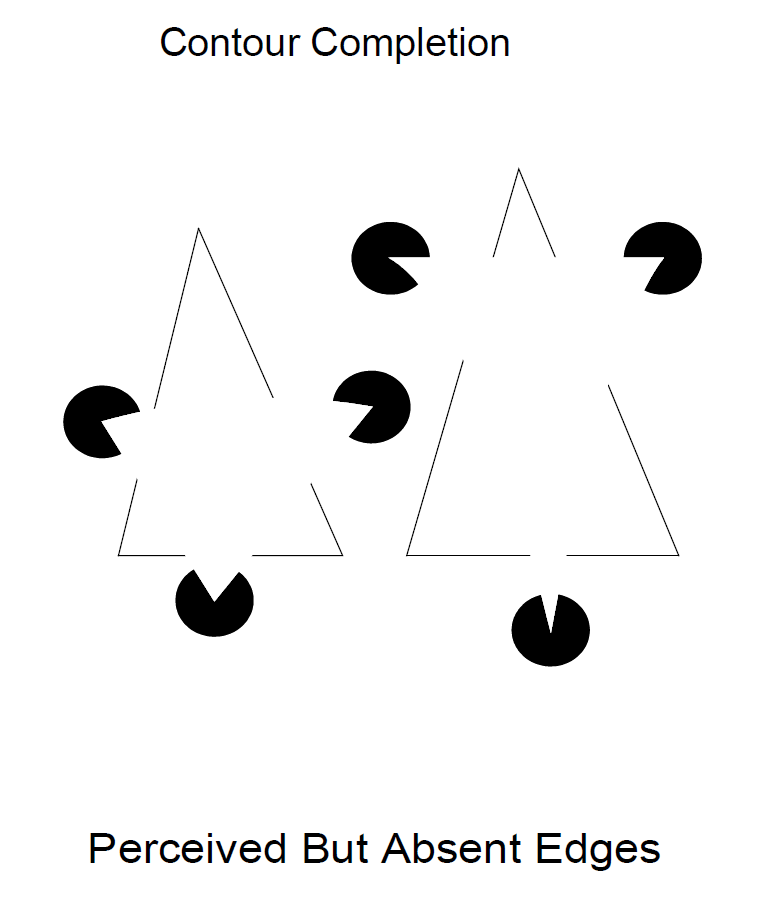

**Types of blindness in people with vision**
 - Color blindness
 - Inattentional blindness
 - Change blindness

how big is the difference visually and our ability to actually perceive and tell there is a difference here 

### 10.3 Weber's Law

**Just noticeable differences and the probability of detection**

 - Related to the ratios of stimuli magnitudes
 - Difference detection is more likely when ratios are further from 1
 
**Which line is longer?**
 
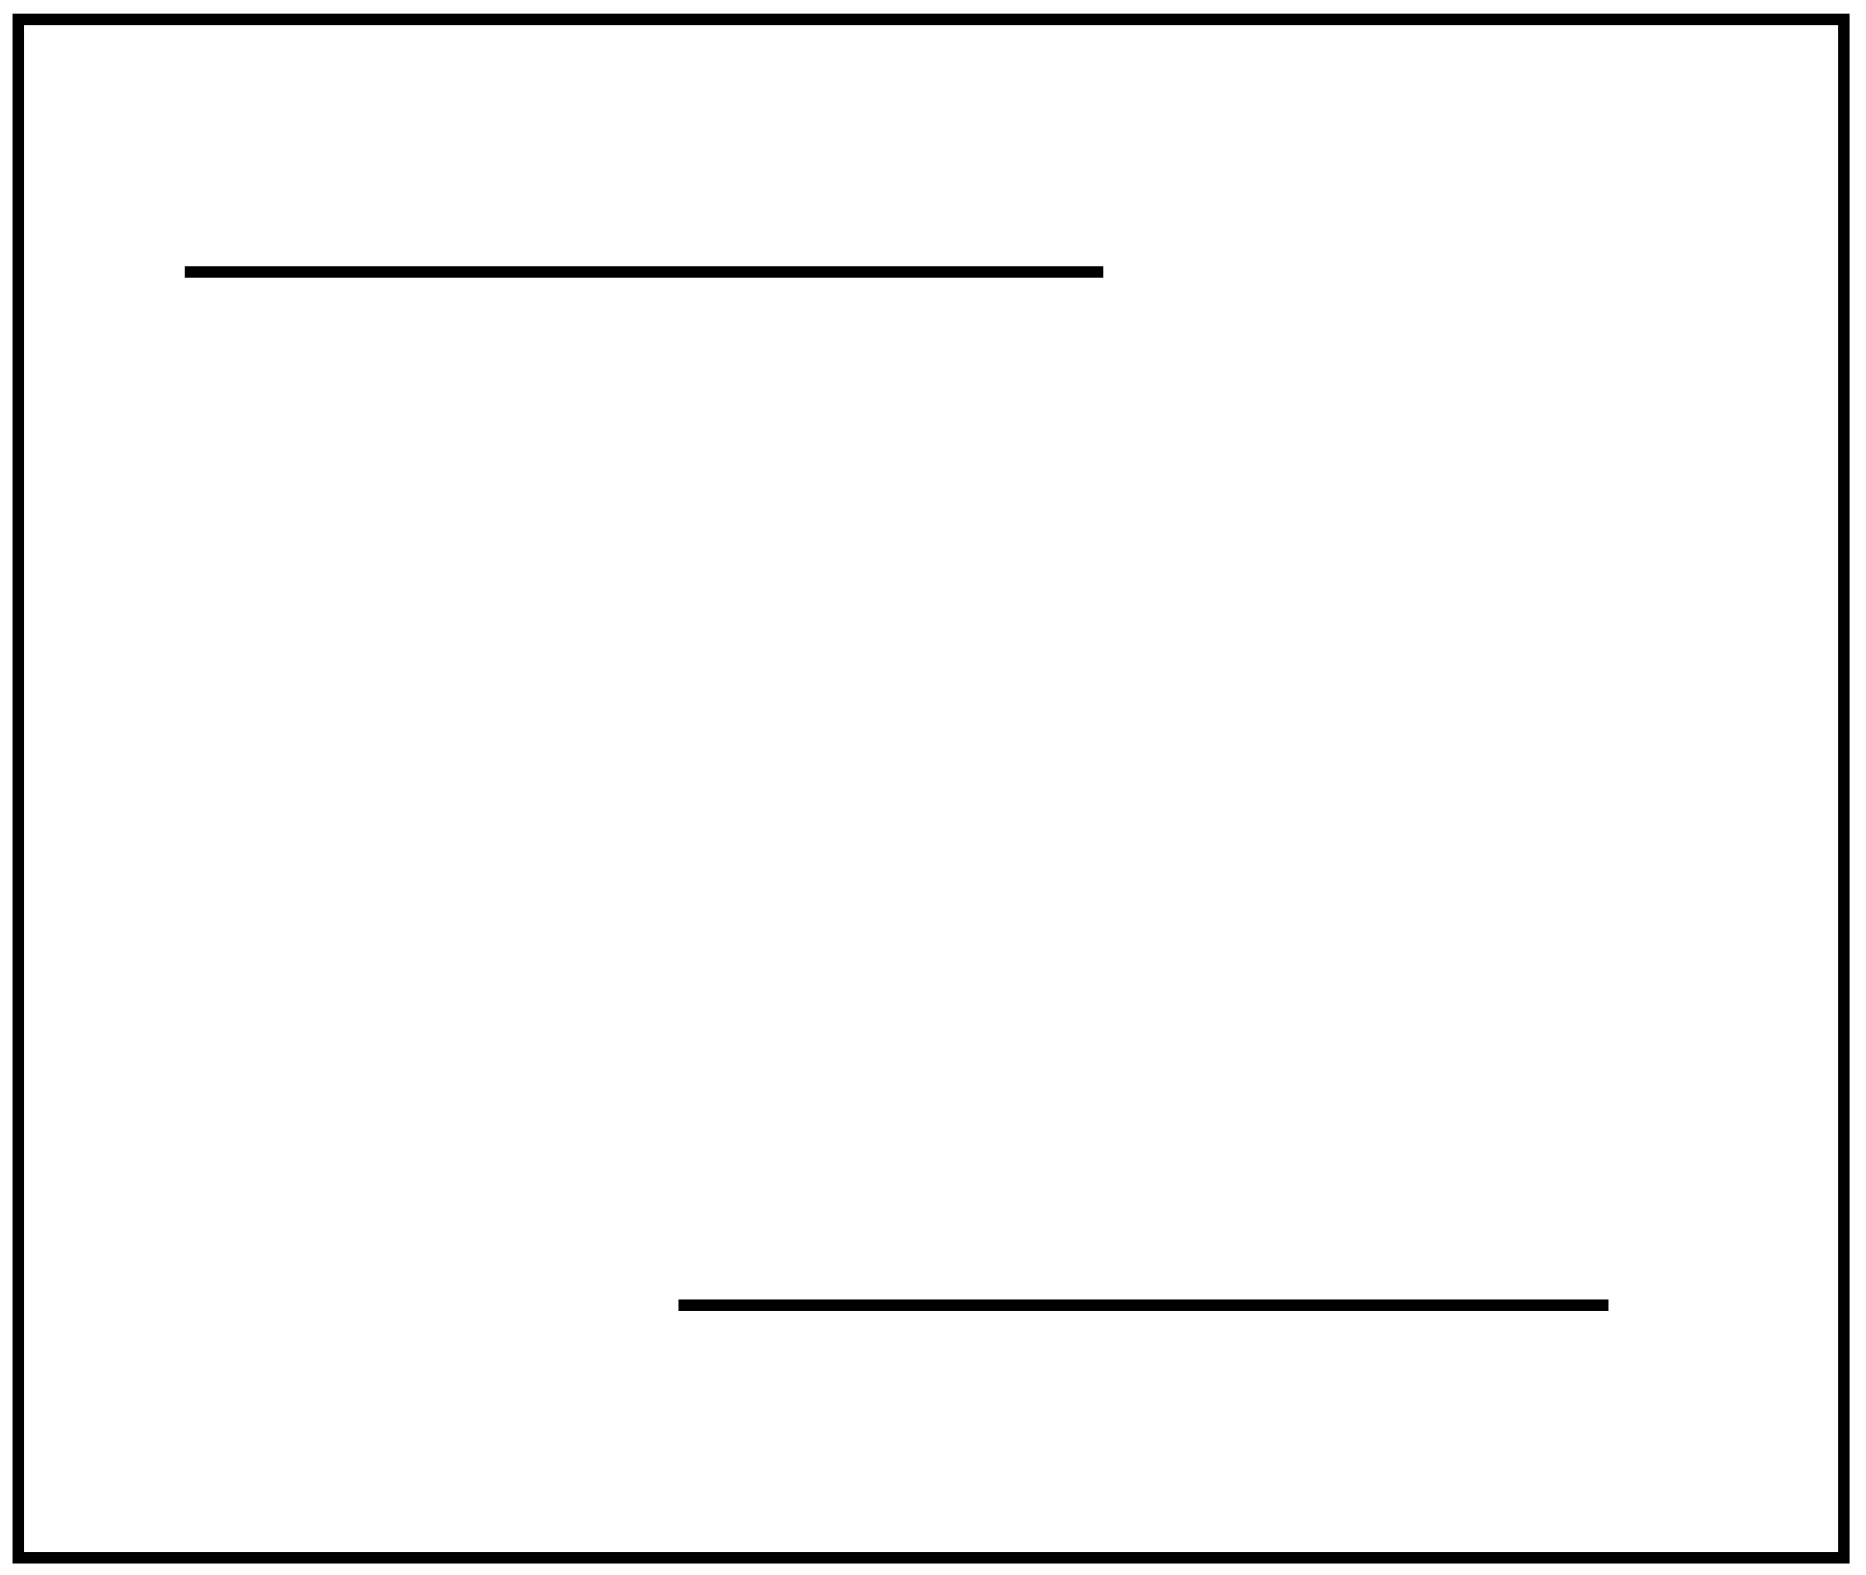

Line lengths have a ratio of 1.02.  

How about now.  Which line is longer?

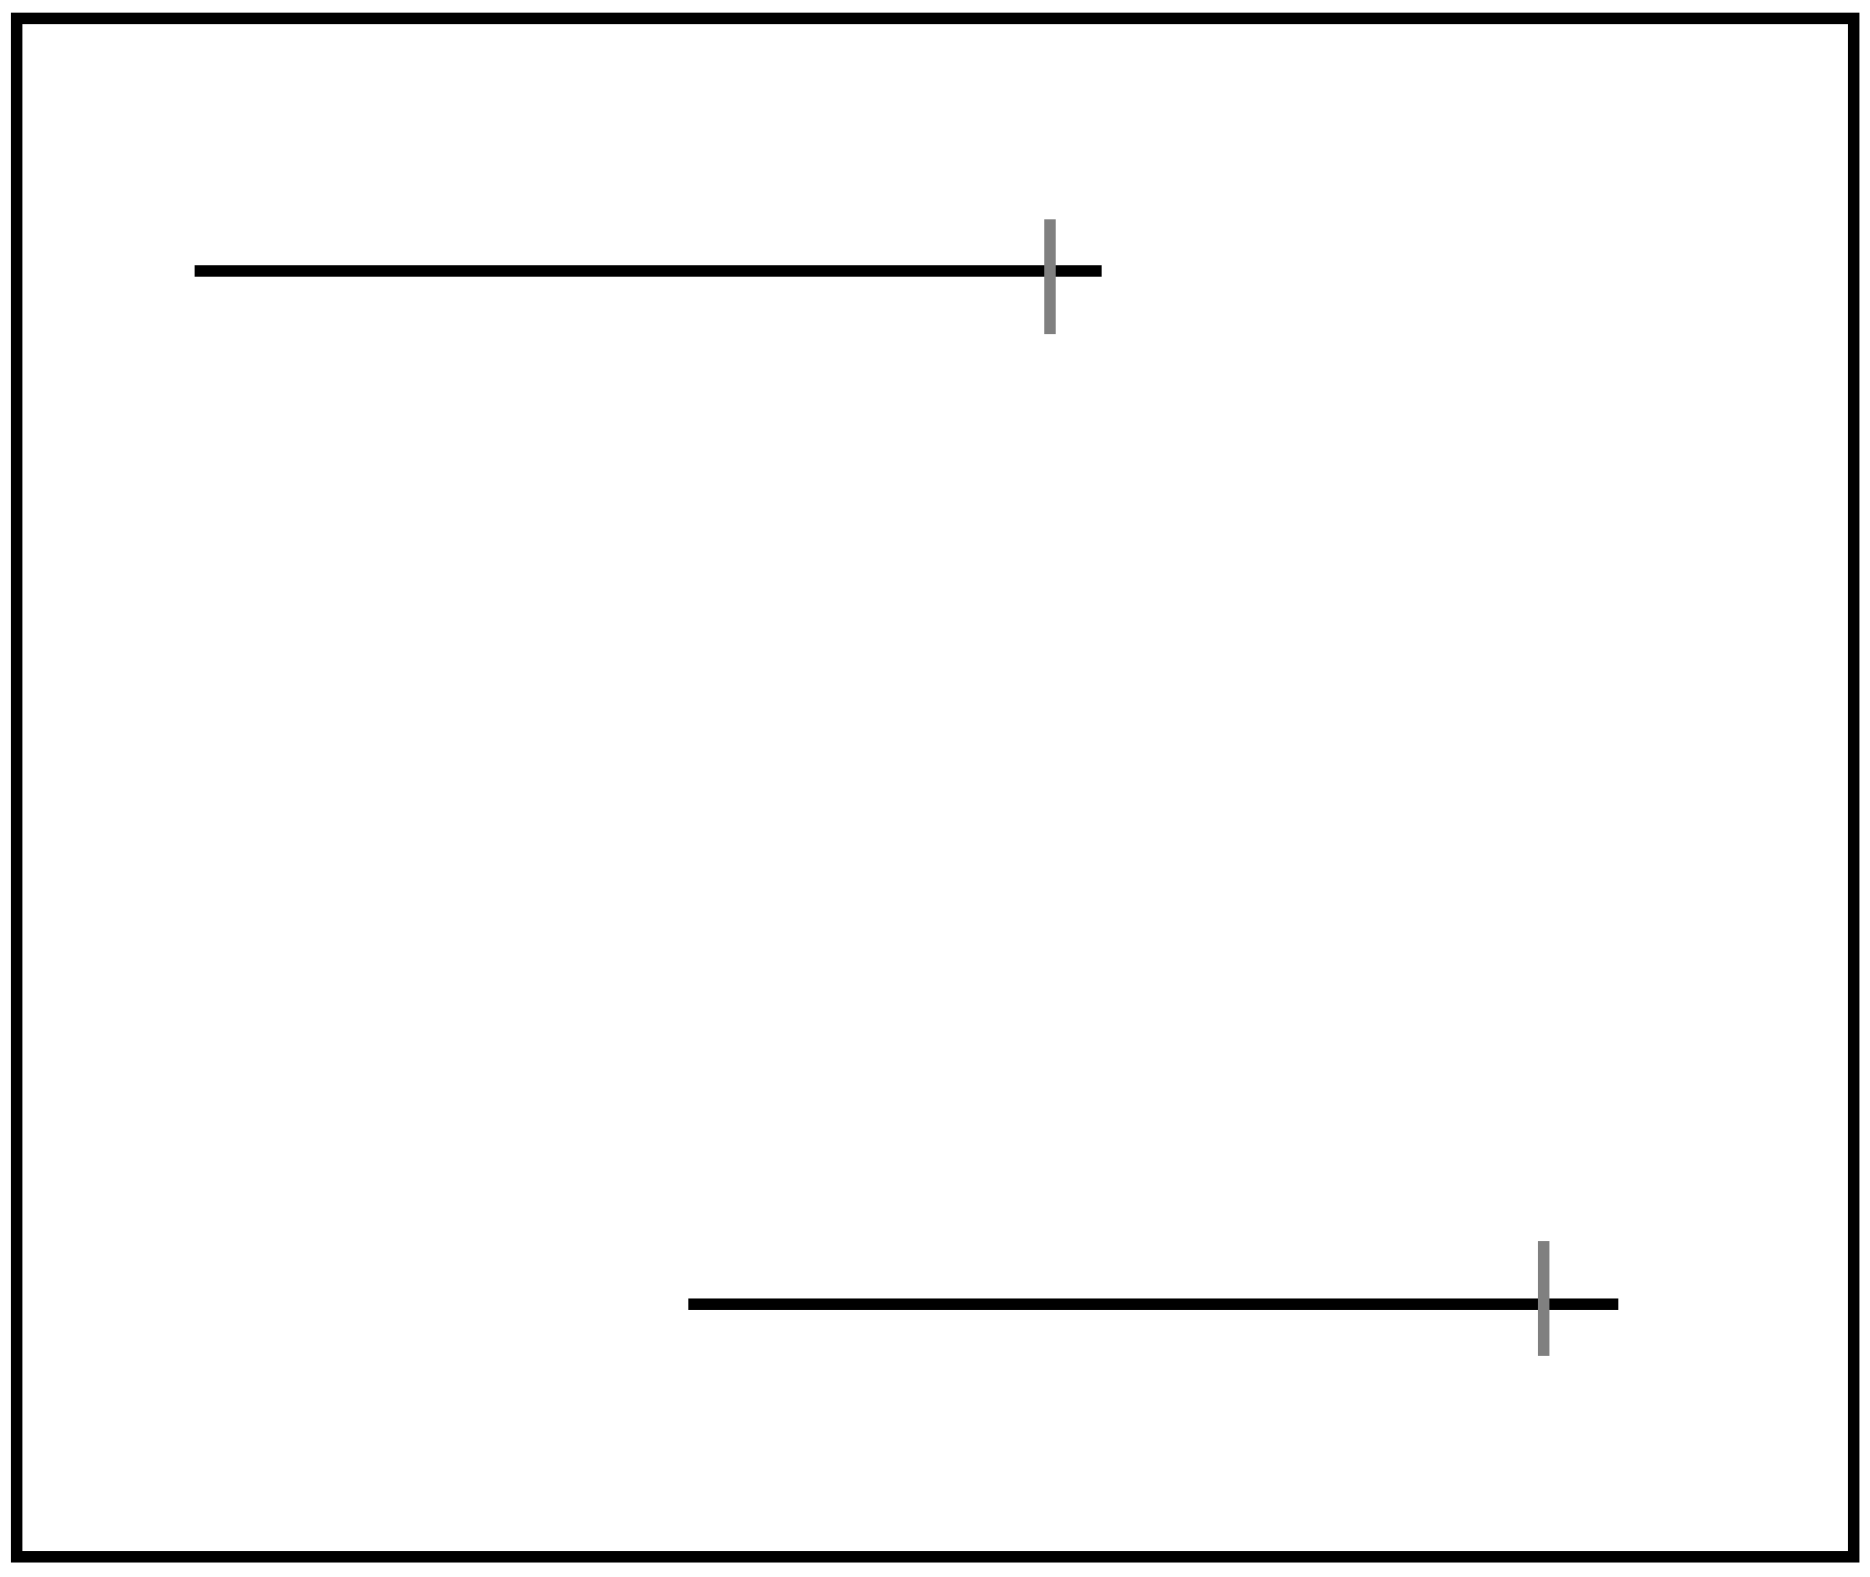

Using the marker of equal lengths, our eyes can focus in on the line lengths after the marker.  This increases the ratio of the line lengths after the marker, which makes it easier to detect the difference.

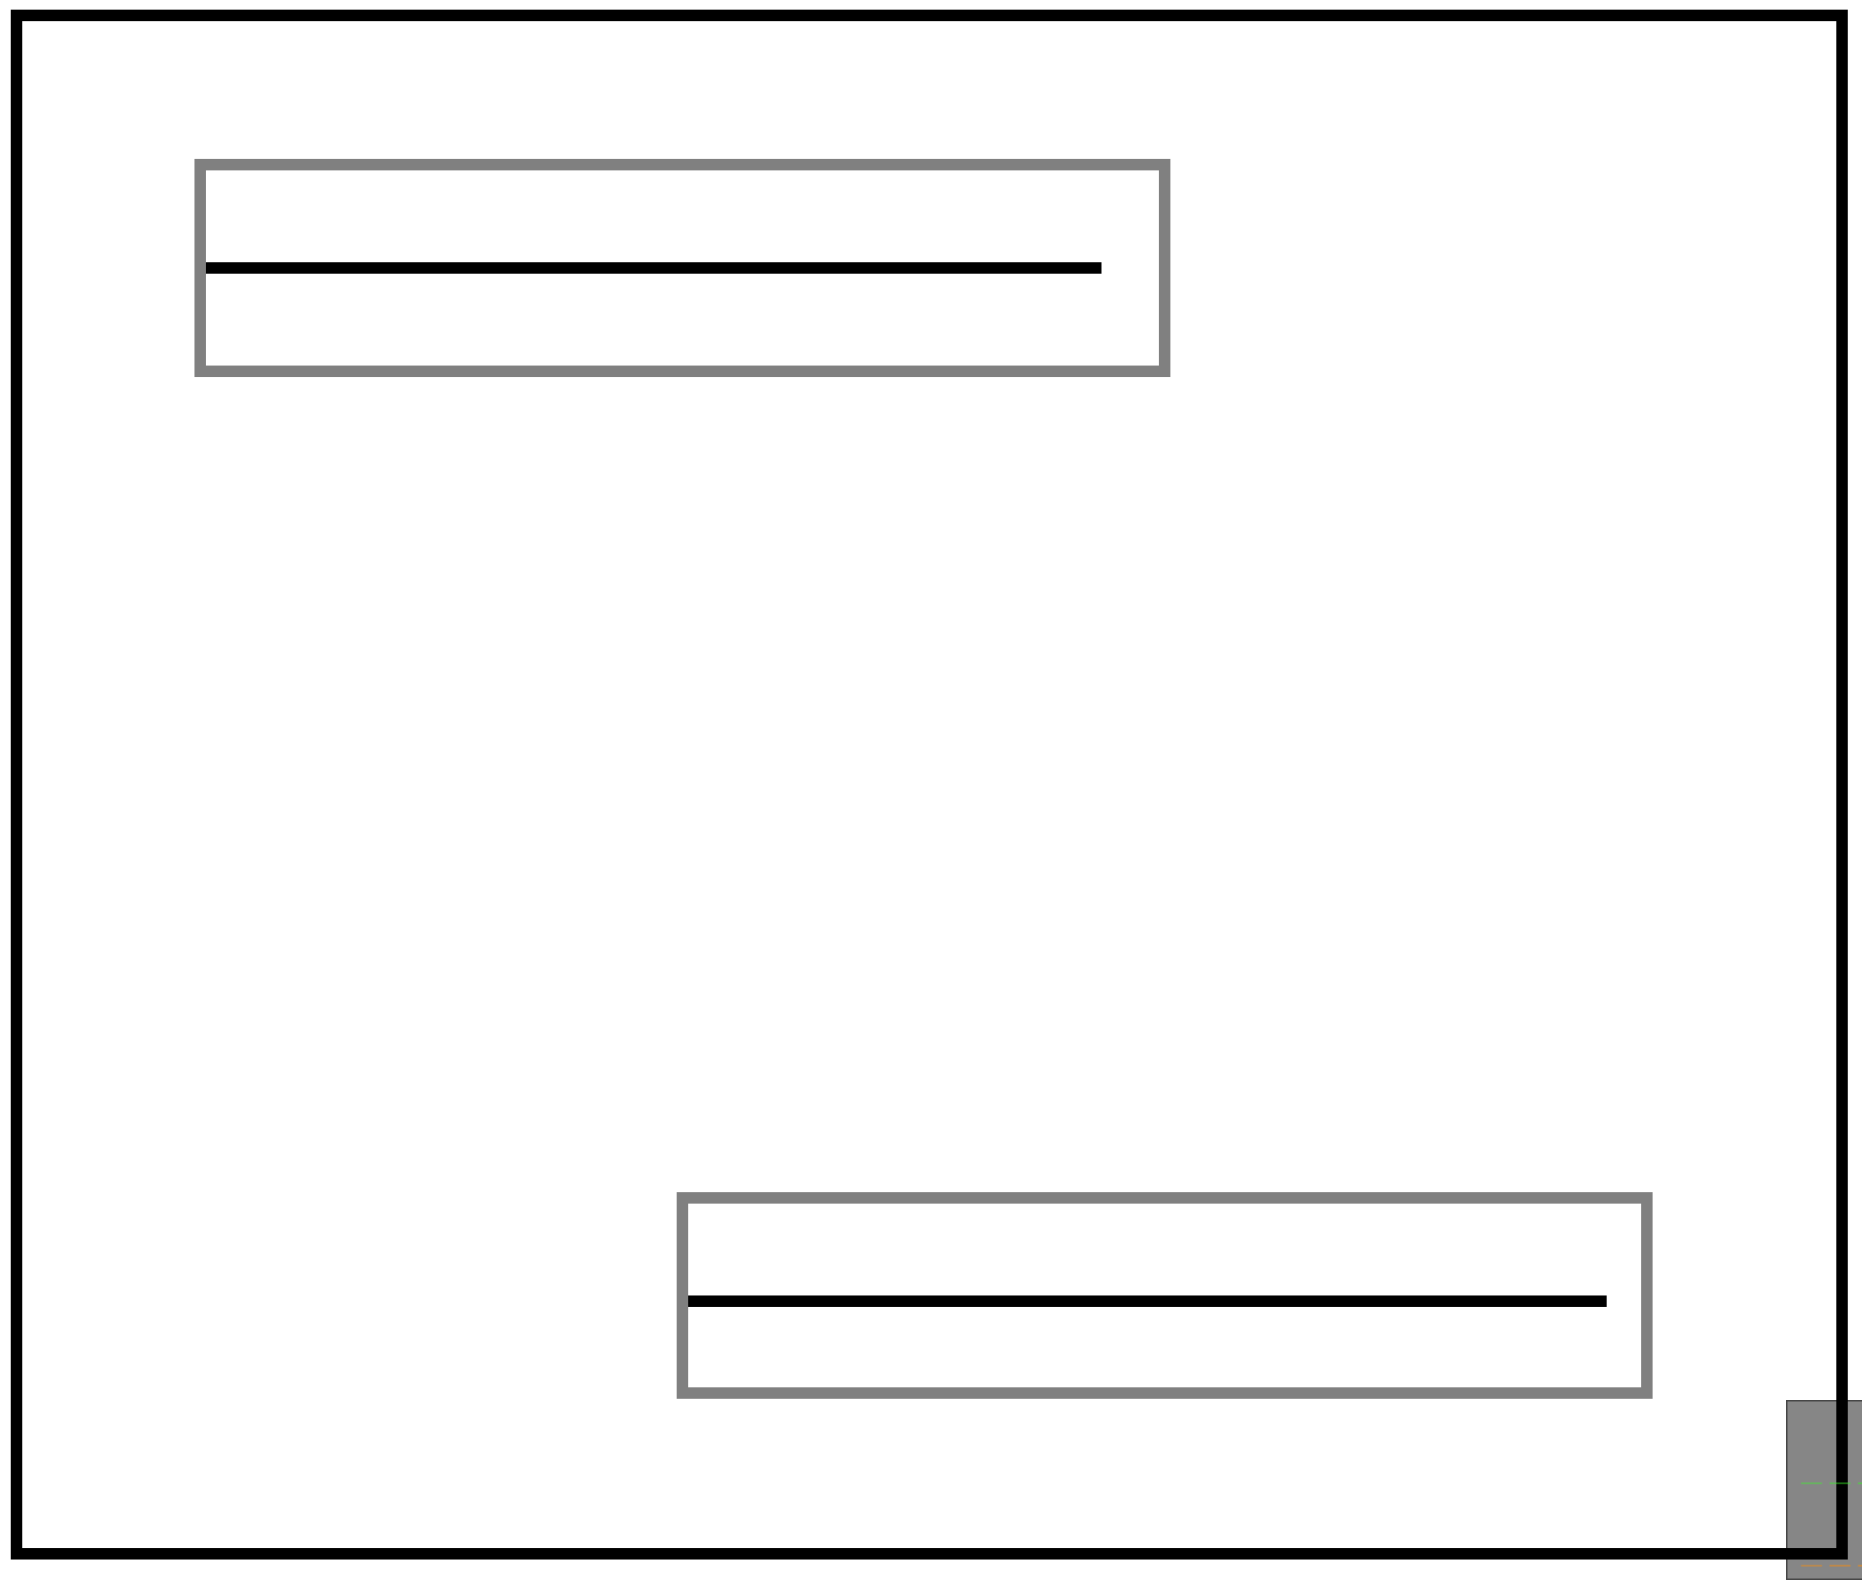

Same idea with the equal sized boxes.  

**Grid lines** take advantage of this idea to help with comparisons between patterns. Consider comparing the x and y location of x and y minima without and with background grid lines.  Which of the below graphs has a smaller minima?

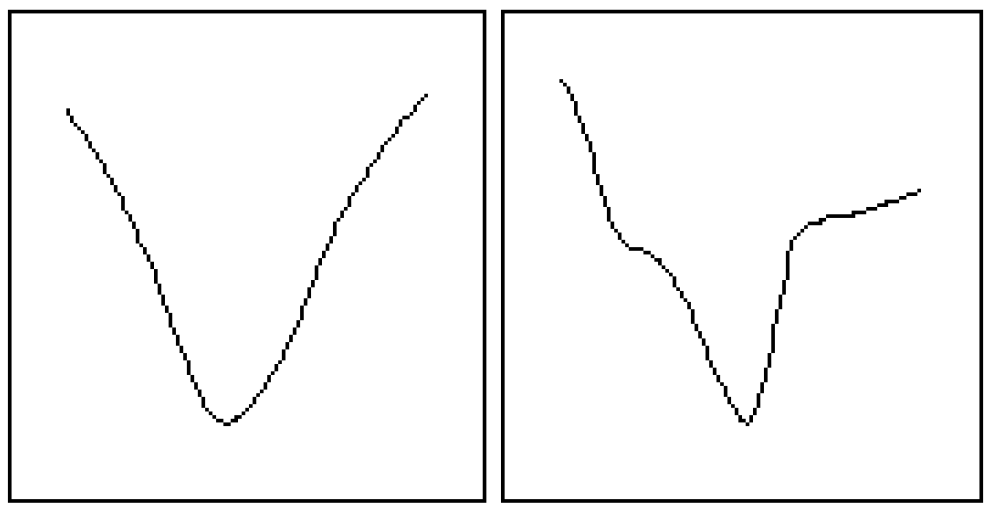

How about now.

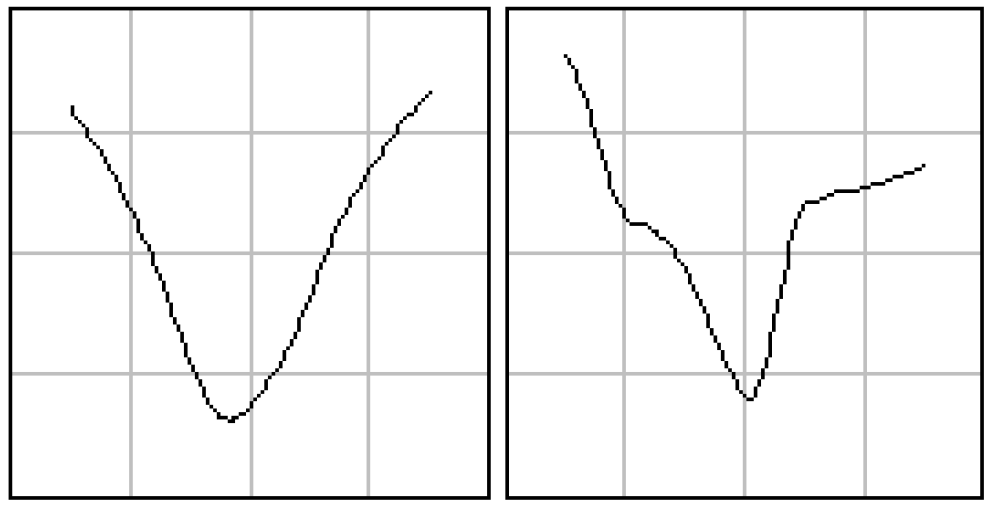

Easier right?  Thank you grid lines!

### 10.4 Perceptual accuracy of extraction for continuous variable encodings (Cleveland and McGill, 1984)

1. Position along a scale (best)
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume
6. Shading (worse)

### 10.5 Superimposition vs. juxtaposition

When our eyes 'jump' from one image to another, there is no input.  The old image fades in about 1/5 of a second. A smaller part of the image under scrutiny is retained longer, but then we are blind to changes elsewhere in the image. Comparing juxtaposed images requires back and forth scrutiny.  This is tiring. Consider the comparisons needed to tell the story you want the readers to understand and choose the image accordingly.

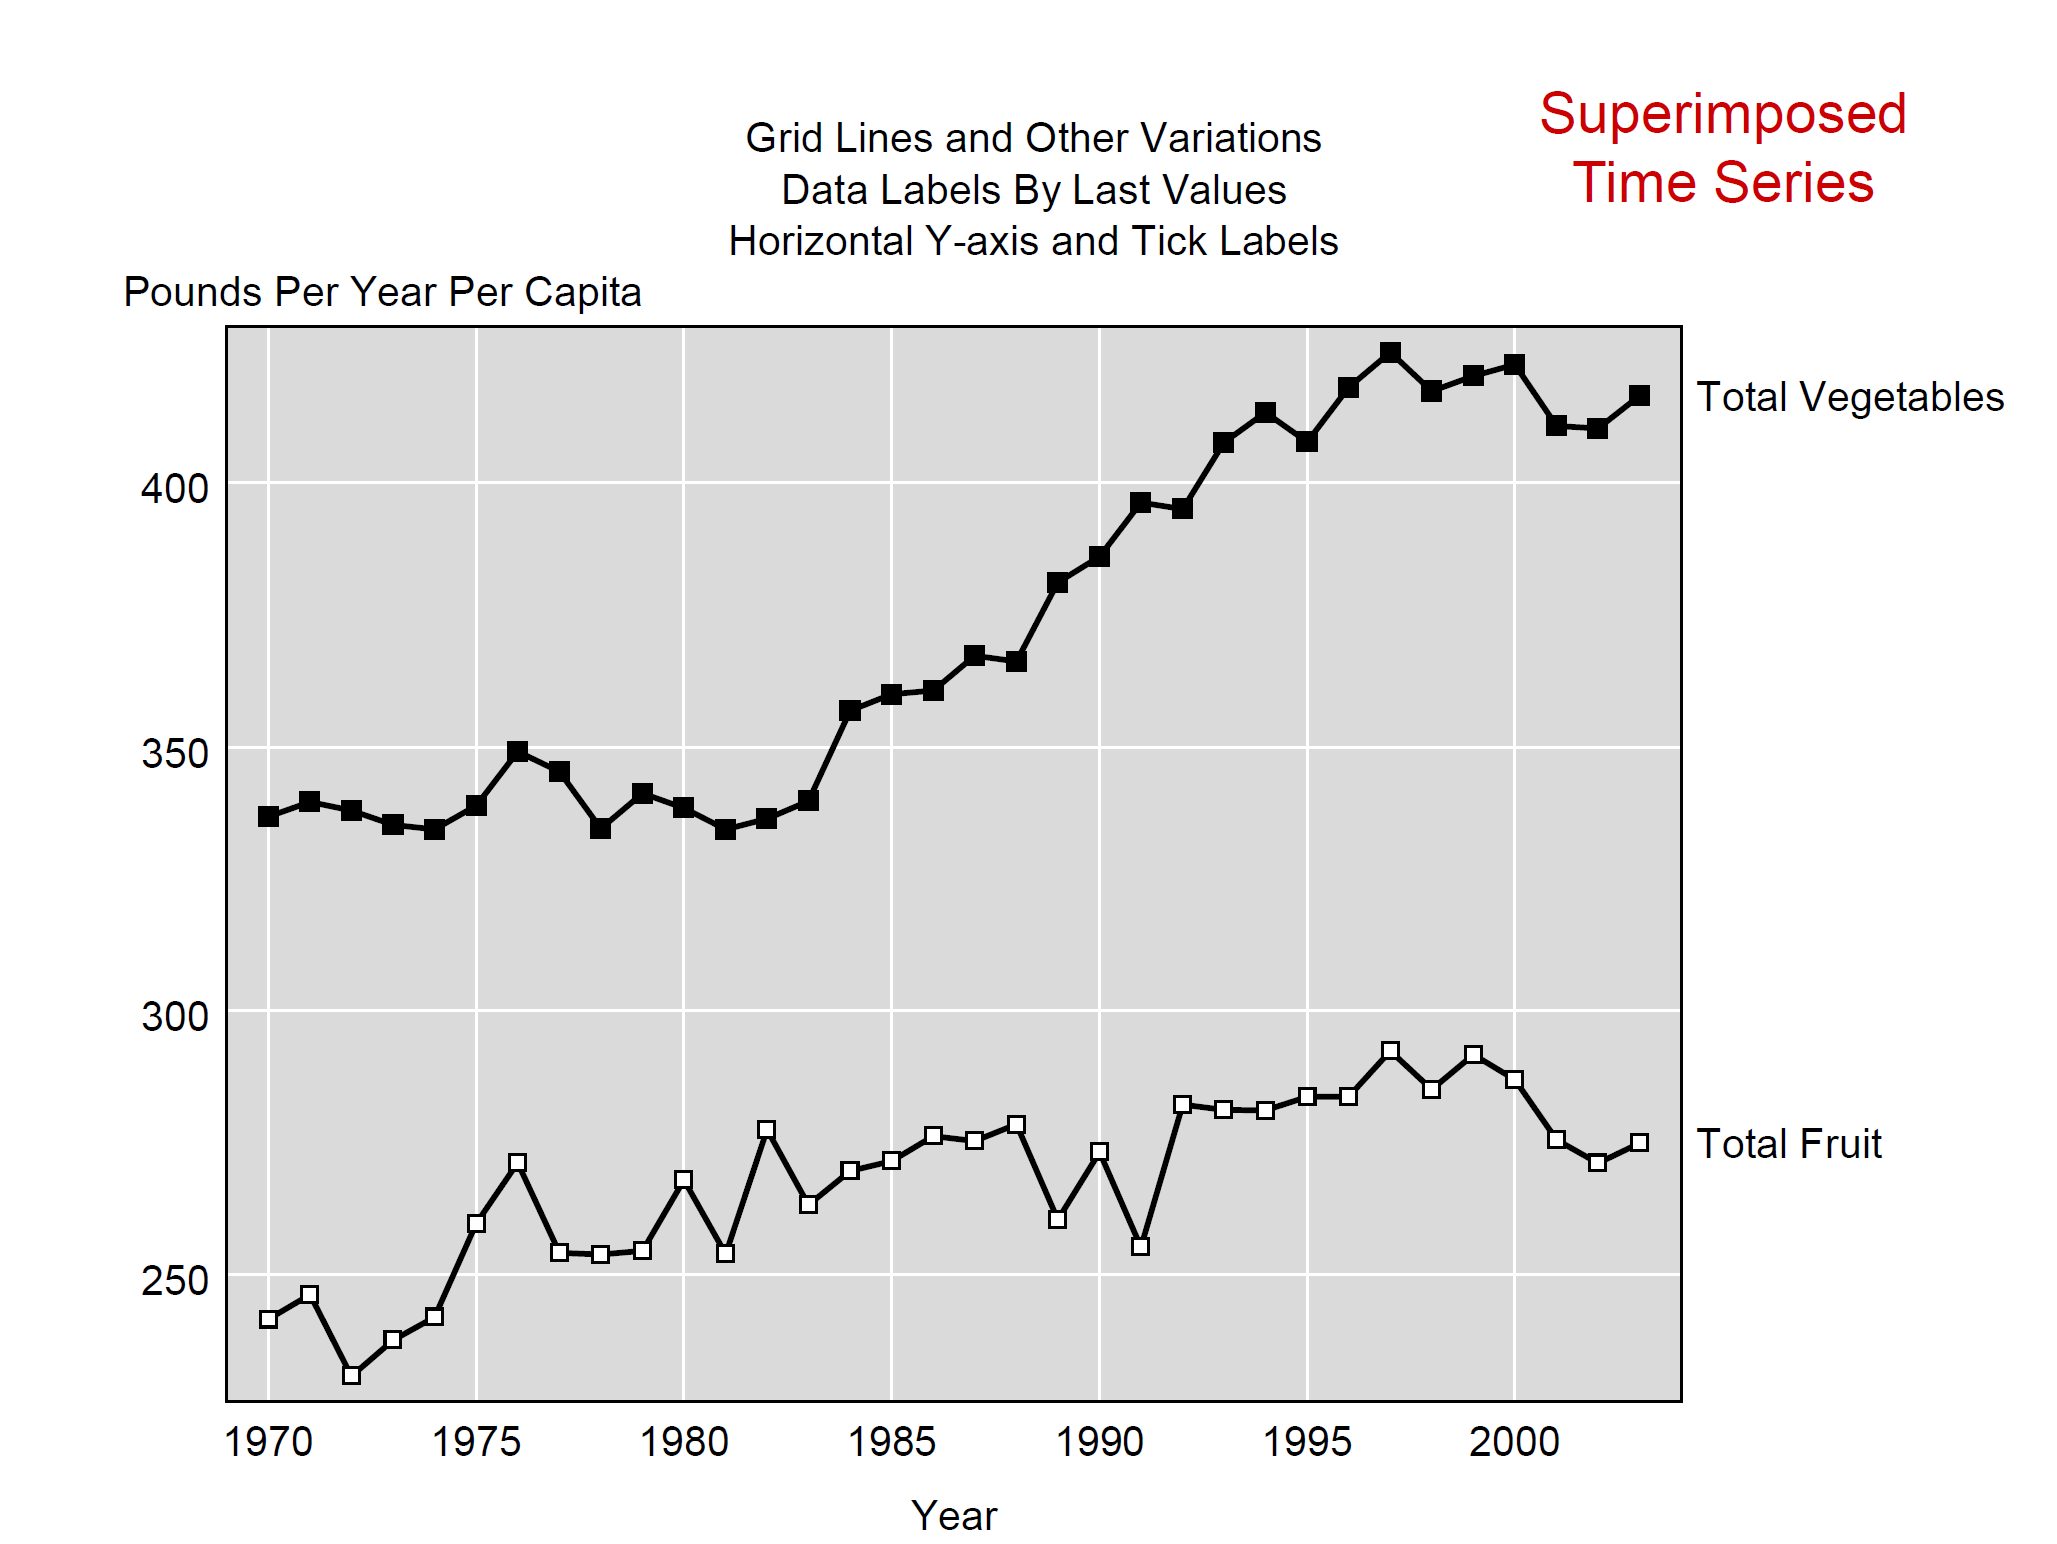

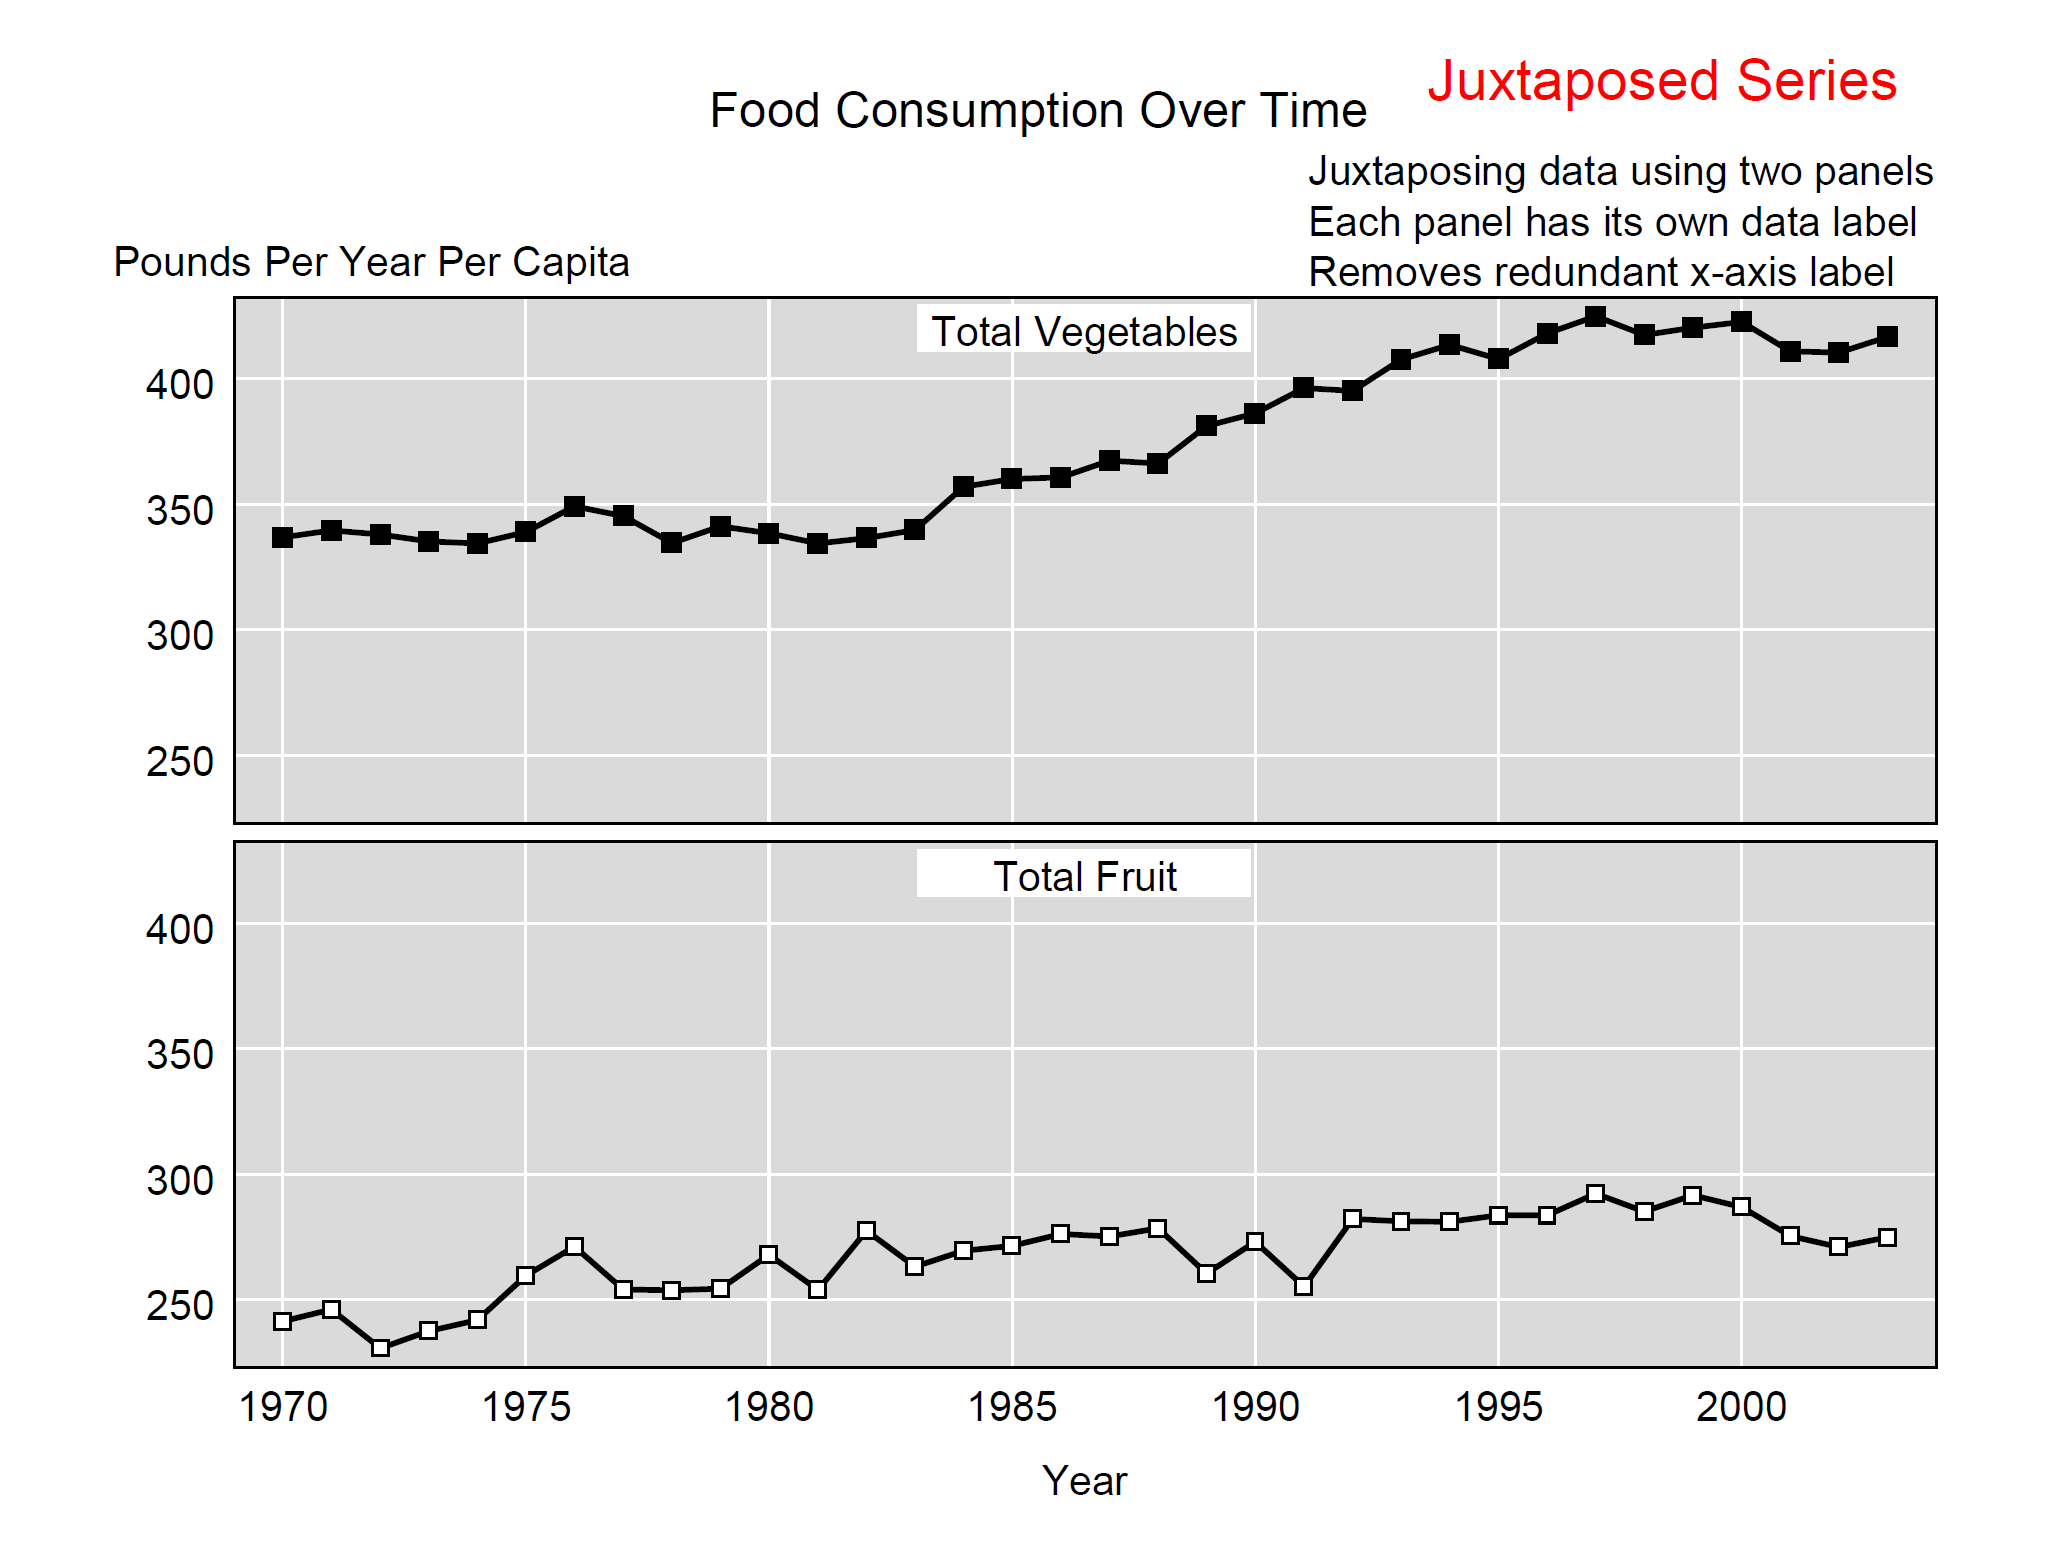

Rapid alternation of almost identical images is often used to find changes between almost identical photos.
Changes appear as blinking. Inserting a blank image between images emulates change blindness

## 10.6 Comparing curves (we don't do this well)

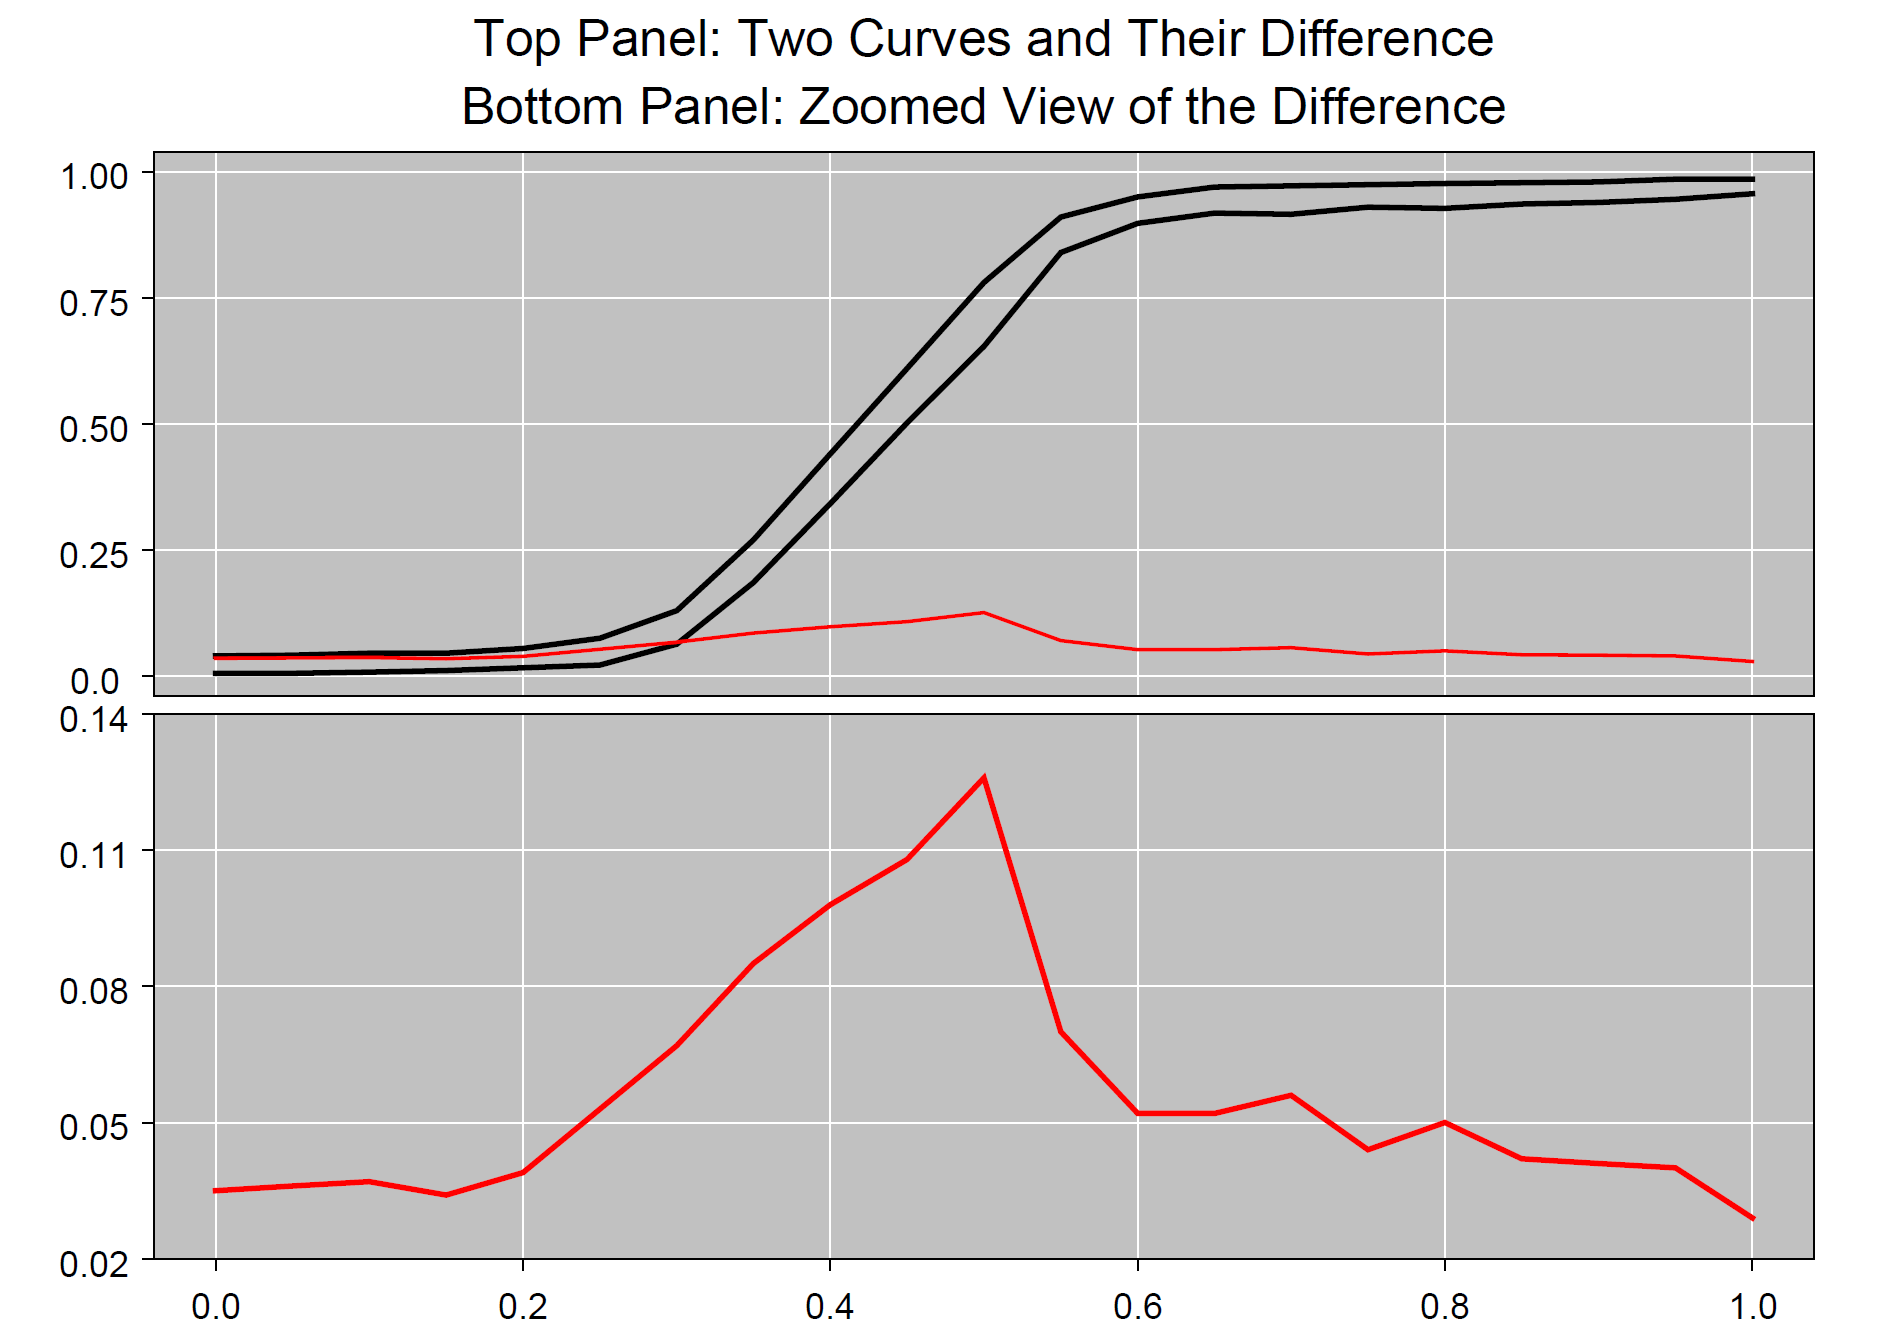

If you want to emphasize the difference in curves, why not plot the difference?

### 10.7 Quantitative graphic guidelines

Four general goals under tension
 - Enable accurate comparisons
 - Simplify appearance
 - Provide context for interpretation
 - Engage the reader/analyst
 
Use visual encodings with high perceptual accuracy of extraction
 - Best encodings: Position along a scale or along identical scales
 - Grid lines increase decoding and shape comparison accuracy
 - Good examples: Dot plots, bar charts, scatter plots, time series plots
 
Comparison layouts
 - Superimpose
 - Juxtapose with comparable scales
 - Show differences explicitly
 
Comparison accuracy decreases with distance
 - Organize to make key items for comparison close together

Context is important in comparisons
 - Provide reference lines
 - Control extraneous sources of variation